In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
df=pd.read_csv('master_data/Premi_ClubQ8.csv', sep=';')

/Users/tomrigal/opt/miniconda3/envs/gbac/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df_head = df.head(1000)

In [5]:
df = df.set_index('COD_PAN_DA_POS') # set directly the ID code as the index of the dataframe

In [6]:
# see the caategorical variables and the absolute variables
cols_focus_cat = [
    'LUOGO_PRENOTAZIONE_PREMIO',
    'CATEGORIA',
    'RAGGRUPPAMENTO_MERCEOLOGICO',
    'DESCRIZIONE',
]
cols_focus_num = [
    'PUNTI_RICHIESTI',
    'CONTRIBUTO_CLIENTE_CON_IVA',
]

In [7]:
cols_focus = cols_focus_cat + cols_focus_num

In [8]:
df[cols_focus_num].describe().transpose()

,count,unique,top,freq
PUNTI_RICHIESTI,501220,324,430,160070
CONTRIBUTO_CLIENTE_CON_IVA,463554,42,"0,000000",389550


In [9]:
df[cols_focus_cat].astype(str).describe().transpose()

,count,unique,top,freq
LUOGO_PRENOTAZIONE_PREMIO,501449,2,PUNTO VENDITA,469059
CATEGORIA,501449,2,BUONO SCONTO CARBURANTE,272660
RAGGRUPPAMENTO_MERCEOLOGICO,501449,20,BUONO SCONTO CARBURANTE,272660
DESCRIZIONE,501449,393,BUONO SCONTO CARB 4E 430 PUNTI,88550


In [10]:
def get_frequencies(series: pd.Series, n_categories: int = None, 
                    bins: int = None, dropna: bool = True
                    ) -> pd.DataFrame:
    vc = series.value_counts(ascending=False,
                             bins=bins,
                             dropna=dropna
                            ) 
    if n_categories is not None:
        if not isinstance(n_categories, int) or n_categories <= 0:
            raise TypeError('n_categories should be a strictly positive integer')
        if n_categories < len(vc):
            freq_others = vc.iloc[n_categories - 1:].sum()
            vc = vc.iloc[:n_categories - 1]\
                   .append(pd.Series({'others': freq_others}))
    return pd.DataFrame({'absolute': vc,
                         'relative': vc / len(series) * 100,
                         },
                        index=vc.index
                        )

In [11]:
get_frequencies(df['CATEGORIA'], n_categories=2)

,absolute,relative
BUONO SCONTO CARBURANTE,272660,54.374423
PREMIO FISICO,228789,45.625577


In [12]:
get_frequencies(df['LUOGO_PRENOTAZIONE_PREMIO'], n_categories=2)

,absolute,relative
PUNTO VENDITA,469059,93.540719
ONLINE,32390,6.459281


In [13]:
get_frequencies(df['RAGGRUPPAMENTO_MERCEOLOGICO'], n_categories=20)

,absolute,relative
BUONO SCONTO CARBURANTE,272660,54.374423
PER LA TUA CASA,68450,13.650441
PER TE,30569,6.096133
ELETTRONICA,24924,4.970396
TAVOLA & CUCINA,20407,4.069606
CASA,18529,3.695092
ELETTRODOMESTICI,17489,3.487693
PER IL TUO BENESSERE,14858,2.963013
TEMPO LIBERO,9569,1.908270
MODA,7237,1.443218


In [14]:
get_frequencies(df['DESCRIZIONE'], n_categories=393)

,absolute,relative
BUONO SCONTO CARB 4E 430 PUNTI,88550,17.658825
BUONO SCONTO CARB 4E 860 PUNTI,70302,14.019771
BUONO SCONTO CARB 4E 1290 PUNTI,66117,13.185189
BUONO SCONTO CARB 4E 2580 PUNTI,47553,9.483118
CONSEGNA PASTA GAROFALO,30722,6.126645
...,...,...
ANNULLO PRENOTAZIONE OROL.+ BRACCIALE,1,0.000199
ANNULLO PRENOTAZIONE SECTOR OROLOGIO +BRACCIALE DO,1,0.000199
ANNULLO PRENOTAZIONE PINZA SCOLAFRITTO,1,0.000199
ANNULLO PRENOTAZIONE OROLOGIO UOMO,1,0.000199


In [15]:
df['CATEGORIA'].value_counts()

BUONO SCONTO CARBURANTE    272660
PREMIO FISICO              228789
Name: CATEGORIA, dtype: int64

In [16]:
df['LUOGO_PRENOTAZIONE_PREMIO'].value_counts()

PUNTO VENDITA    469059
ONLINE            32390
Name: LUOGO_PRENOTAZIONE_PREMIO, dtype: int64

In [17]:
df['RAGGRUPPAMENTO_MERCEOLOGICO'].value_counts()

BUONO SCONTO CARBURANTE    272660
PER LA TUA CASA             68450
PER TE                      30569
ELETTRONICA                 24924
TAVOLA & CUCINA             20407
CASA                        18529
ELETTRODOMESTICI            17489
PER IL TUO BENESSERE        14858
TEMPO LIBERO                 9569
MODA                         7237
SPORT                        3438
PER IL TUO AMBIENTE          2849
PER IL TUO BAMBINO           2837
PER IL TUO VIAGGIO           2171
BAMBINI                      1749
AMICI A 4 ZAMPE              1554
GUARDA & PRENOTA             1366
BELLEZZA & BENESSERE          698
PER IL  TUO CUCCIOLO           60
ONLUS & PROGETTI               35
Name: RAGGRUPPAMENTO_MERCEOLOGICO, dtype: int64

In [18]:
df['DESCRIZIONE'].value_counts()

BUONO SCONTO CARB 4E 430 PUNTI                        88550
BUONO SCONTO CARB 4E 860 PUNTI                        70302
BUONO SCONTO CARB 4E 1290 PUNTI                       66117
BUONO SCONTO CARB 4E 2580 PUNTI                       47553
CONSEGNA PASTA GAROFALO                               30722
                                                      ...  
ANNULLO PRENOTAZIONE OROL.+ BRACCIALE                     1
ANNULLO PRENOTAZIONE SECTOR OROLOGIO +BRACCIALE DO        1
ANNULLO PRENOTAZIONE PINZA SCOLAFRITTO                    1
ANNULLO PRENOTAZIONE OROLOGIO UOMO                        1
ANNULLO PRENOTAZIONE GALAXY A12 BLACK                     1
Name: DESCRIZIONE, Length: 393, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

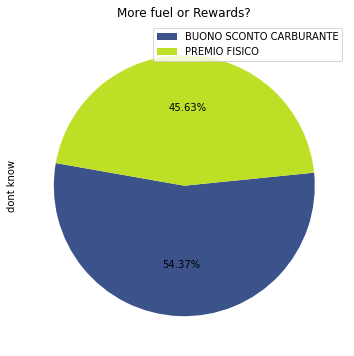

In [19]:
tmp = get_frequencies(df['CATEGORIA'], n_categories=2)['relative']
cmap = cm.get_cmap('viridis')
ax = tmp.plot(kind='pie',
              title="More fuel or Rewards?", autopct='{:02.2f}%'.format,
              legend=True,
              labeldistance=None,
              startangle=170,
              colors=[cmap(i) for i in np.linspace(.25, .9, len(tmp
 ))],
              figsize=(6, 6)
             )
ax.set(ylabel='dont know')
plt.show


In [40]:
prize_description = df["DESCRIZIONE"].value_counts()
prize_description = prize_description.index.to_list()
prize_description = sorted(prize_description)
prize_description = prize_description[106:]

prize_description

['BUONO SCONTO CARB 4E 1290 PUNTI',
 'BUONO SCONTO CARB 4E 2580 PUNTI',
 'BUONO SCONTO CARB 4E 430 PUNTI',
 'BUONO SCONTO CARB 4E 450 PUNTI',
 'BUONO SCONTO CARB 4E 860 PUNTI',
 'CONSEGNA CODICE 50 STAMPE FOTO',
 'CONSEGNA CODICE ABBON FAI',
 'CONSEGNA CODICE ALBERO TREEDOM',
 'CONSEGNA CODICE ASPARAGIERA',
 'CONSEGNA CODICE ASPIR IROBOT',
 'CONSEGNA CODICE ASSE DA STIRO',
 'CONSEGNA CODICE ASSE DA STIRO FOPPAPEDRETTI',
 'CONSEGNA CODICE AVIS DREAM CAR 1G',
 'CONSEGNA CODICE AVIS DREAM CAR 1GG',
 'CONSEGNA CODICE AVIS DREAMCAR 1GG',
 'CONSEGNA CODICE BISTECCHIERA',
 'CONSEGNA CODICE BUDGET FAMILY',
 'CONSEGNA CODICE BUDGET NOL 1G',
 'CONSEGNA CODICE CUCINA MODERNA SEM',
 'CONSEGNA CODICE DONNA MODERNA SEM',
 'CONSEGNA CODICE DOVE SEM',
 'CONSEGNA CODICE DUERUOTE 6MESI',
 'CONSEGNA CODICE FOCUS JUNIOR SEM',
 'CONSEGNA CODICE FOCUS SEM',
 'CONSEGNA CODICE GARDALAND',
 'CONSEGNA CODICE GARDALAND PARK',
 'CONSEGNA CODICE GIFT AMILON 100?',
 'CONSEGNA CODICE GIFT AMILON 20?',
 'CONSEGNA COD

<function matplotlib.pyplot.show(close=None, block=None)>

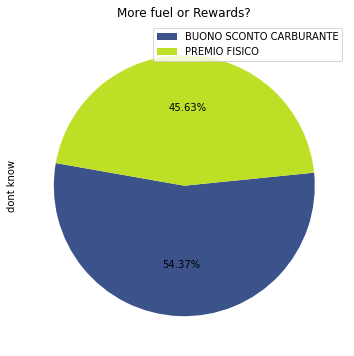

In [20]:
tmp = get_frequencies(df['CATEGORIA'], n_categories=2)['relative']
cmap = cm.get_cmap('viridis')
ax = tmp.plot(kind='pie',
              title="More fuel or Rewards?", autopct='{:02.2f}%'.format,
              legend=True,
              labeldistance=None,
              startangle=170,
              colors=[cmap(i) for i in np.linspace(.25, .9, len(tmp
 ))],
              figsize=(6, 6)
             )
ax.set(ylabel='dont know')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

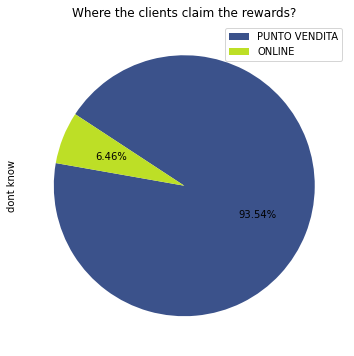

In [21]:
tmp = get_frequencies(df['LUOGO_PRENOTAZIONE_PREMIO'], n_categories=2)['relative']
cmap = cm.get_cmap('viridis')
ax = tmp.plot(kind='pie',
              title="Where the clients claim the rewards?", autopct='{:02.2f}%'.format,
              legend=True,
              labeldistance=None,
              startangle=170,
              colors=[cmap(i) for i in np.linspace(.25, .9, len(tmp
 ))],
              figsize=(6, 6)
             )
ax.set(ylabel='dont know')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

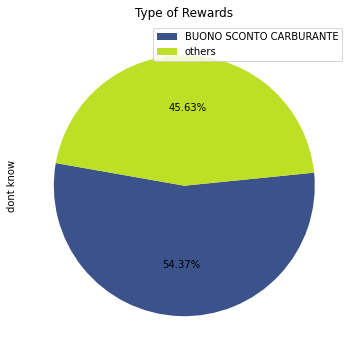

In [22]:
tmp = get_frequencies(df['RAGGRUPPAMENTO_MERCEOLOGICO'], n_categories=2)['relative']
cmap = cm.get_cmap('viridis')
ax = tmp.plot(kind='pie',
              title="Type of Rewards", autopct='{:02.2f}%'.format,
              legend=True,
              labeldistance=None,
              startangle=170,
              colors=[cmap(i) for i in np.linspace(.25, .9, len(tmp
 ))],
              figsize=(6, 6)
             )
ax.set(ylabel='dont know')
plt.show

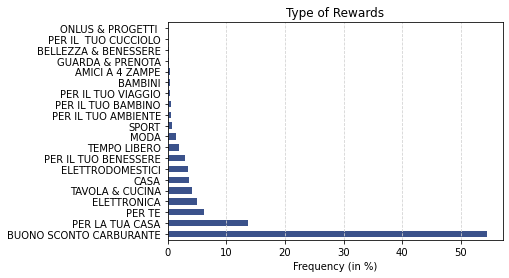

In [23]:
tmp = df['RAGGRUPPAMENTO_MERCEOLOGICO'].value_counts() / len(df) * 100
cmap = cm.get_cmap('viridis')
ax = tmp.plot(kind='barh',
              title="Type of Rewards",
              color=cmap(.25),
              width=.6,
              )
ax.grid(True, axis='x', color='lightgrey', linestyle='--')
ax.set(xlabel='Frequency (in %)')
plt.show()

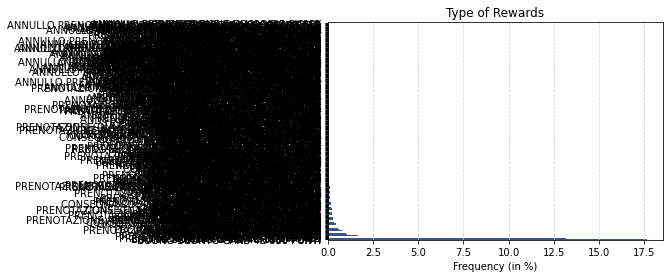

<Figure size 432x288 with 0 Axes>

In [24]:
tmp = df['DESCRIZIONE'].value_counts() / len(df) * 100
cmap = cm.get_cmap('viridis')
ax = tmp.plot(kind='barh',
              title="Type of Rewards",
              color=cmap(.25),
              width=.6,
              )
ax.grid(True, axis='x', color='lightgrey', linestyle='--')
ax.set(xlabel='Frequency (in %)')
plt.show()
plt.tight_layout()

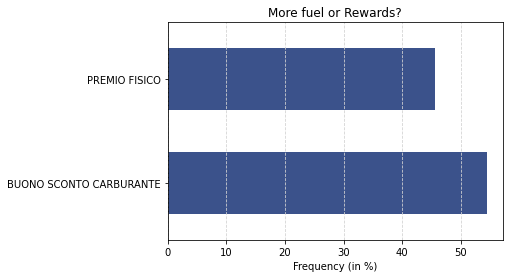

In [25]:
tmp = df['CATEGORIA'].value_counts() / len(df) * 100
cmap = cm.get_cmap('viridis')
ax = tmp.plot(kind='barh',
              title="More fuel or Rewards?",
              color=cmap(.25),
              width=.6,
              )
ax.grid(True, axis='x', color='lightgrey', linestyle='--')
ax.set(xlabel='Frequency (in %)')
plt.show()

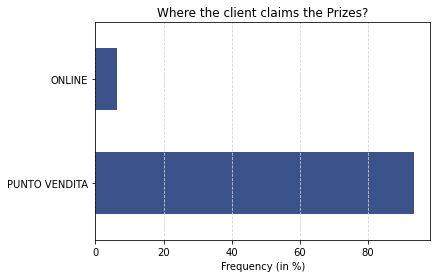

In [26]:
tmp = df['LUOGO_PRENOTAZIONE_PREMIO'].value_counts() / len(df) * 100
cmap = cm.get_cmap('viridis')
ax = tmp.plot(kind='barh',
              title="Where the client claims the Prizes?",
              color=cmap(.25),
              width=.6,
              )
ax.grid(True, axis='x', color='lightgrey', linestyle='--')
ax.set(xlabel='Frequency (in %)')
plt.show()

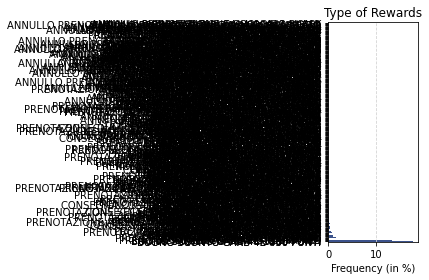

In [27]:
tmp = df['DESCRIZIONE'].value_counts() / len(df) * 100
cmap = cm.get_cmap('viridis')
ax = tmp.plot(kind='barh',
              title="Type of Rewards",
              color=cmap(.25),
              width=.6,
              )
ax.grid(True, axis='x', color='lightgrey', linestyle='--')
ax.set(xlabel='Frequency (in %)')
#plt.tight_layout()
plt.show()